___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)


<IPython.core.display.Javascript object>

## Indest Data

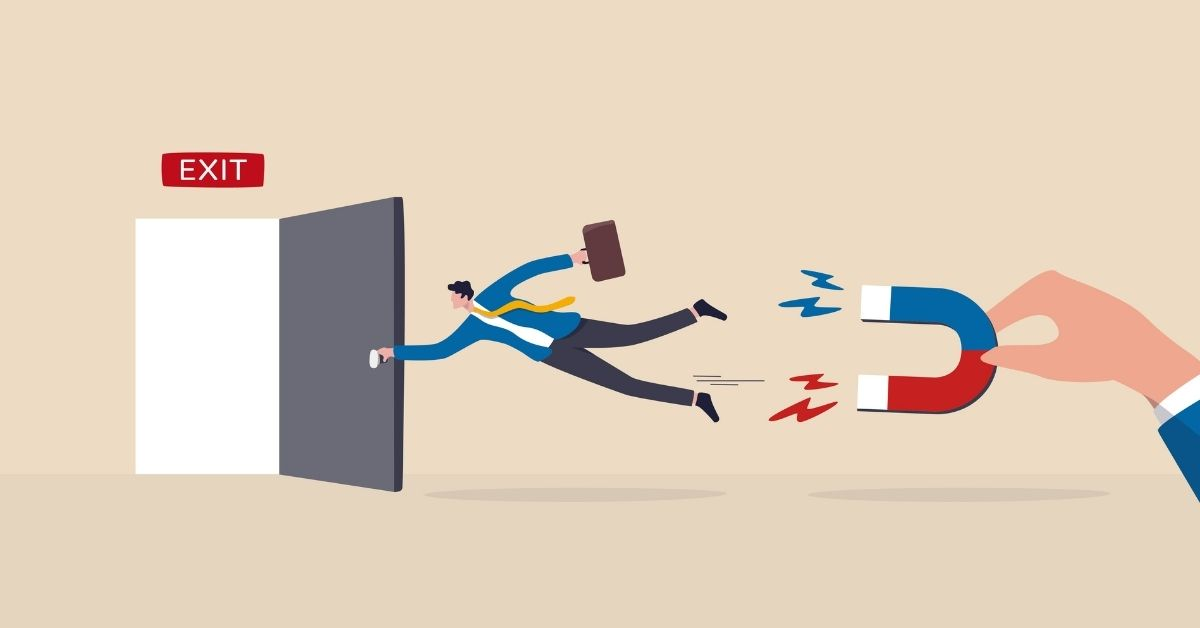

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [3]:
df.shape

(10000, 14)

__Look to columns in the dataset__

There are 14 columns so we will divide them into independent and dependent columns

__Independent variables__

In [4]:
df.columns[:-1]

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

__Dependent variables__

In [5]:
df.columns[-1] # it is our target 

'Exited'

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# we didn't require customerID  and Rownumber so we drop it

df = df.drop(["CustomerId","RowNumber","Surname",],axis=1)

In [11]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='O').keys())

print(cat)

print(num)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [12]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [15]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [17]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [18]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [19]:
df.CreditScore.value_counts()

850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
648     48
660     48
682     47
663     47
640     47
637     46
714     45
686     45
710     45
645     45
633     45
687     45
679     45
706     44
627     44
646     44
619     44
584     43
625     43
628     43
608     43
613     42
635     42
632     42
701     41
554     41
712     41
698     41
601     40
699     40
597     40
634     40
606     40
680     40
644     39
711     39
681     39
656     39
592     38
593     38
659     38
718     38
611     38
630     38
666     38
696     38
641     38
581     38
605     37
675     37
695     37
624     37
629     37
614     37
579     37
653     37
662     37
616     37
639     37
650     37
642     37
724     37
607     36
649     36
622     36
676     36
727     36
636     36
709     36
590     36
707     36
697     36
669     36
661     35
673     35
668     35
685     35
677     35
615     35
704     34
588     34

In [20]:
# we have to convert it 
df.Gender = df.Gender.replace('Male',1)
df.Gender = df.Gender.replace('Female',0)

In [21]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Geography'] = label.fit_transform(df['Geography'])

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000,1,1,1,101348.880,1
1,608,2,0,41,1,83807.860,1,0,1,112542.580,0
2,502,0,0,42,8,159660.800,3,1,0,113931.570,1
3,699,0,0,39,1,0.000,2,0,0,93826.630,0
4,850,2,0,43,2,125510.820,1,1,1,79084.100,0


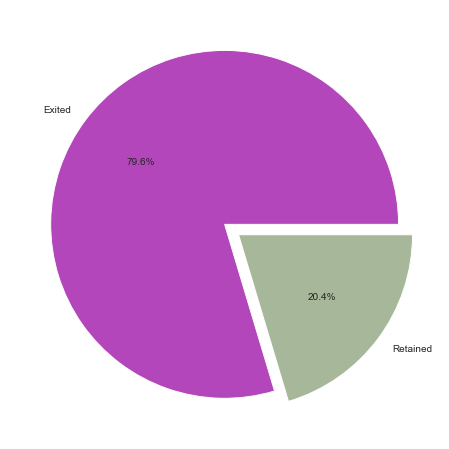

In [25]:
labels = 'Exited', 'Retained'
import random
n = 40
color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(n)]
plt.figure(figsize=(10,8))
explode = [0,0.1]
plt.pie(df['Exited'].value_counts(), labels=labels,explode=explode,autopct='%1.1f%%', colors=color);


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

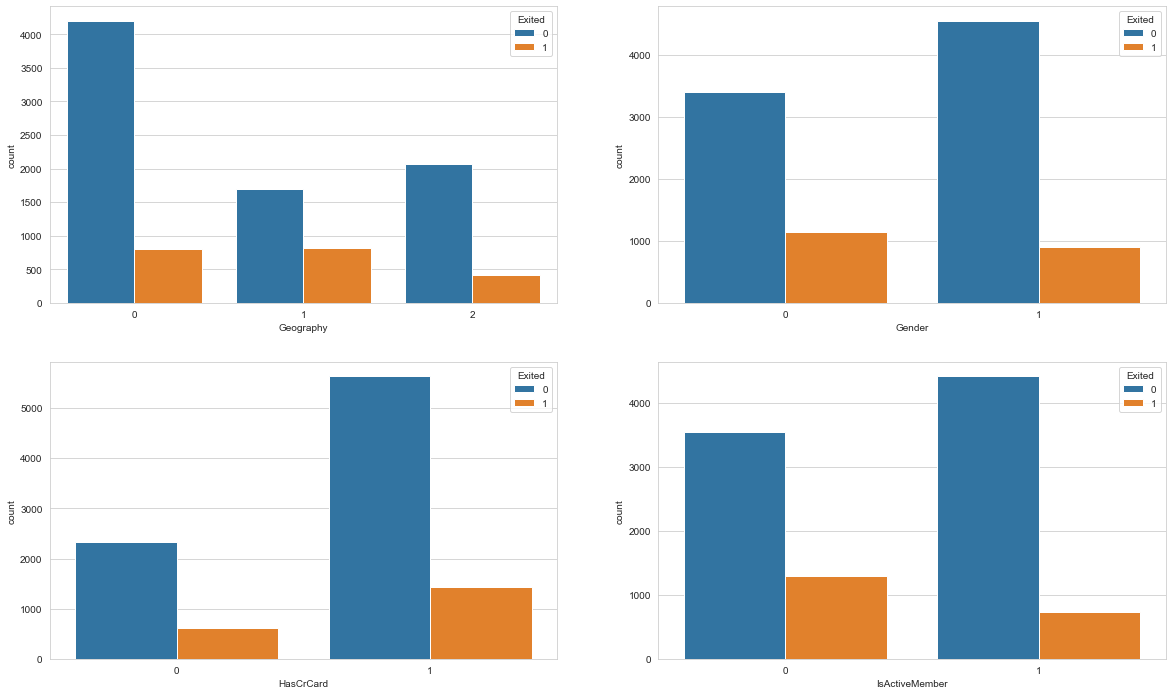

In [33]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<IPython.core.display.Javascript object>

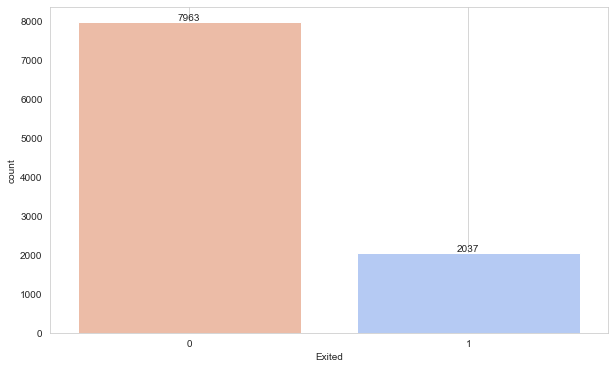

In [100]:
ax = sns.countplot(df['Exited'],palette="coolwarm_r");
ax.bar_label(ax.containers[0]);
plt.grid()

<IPython.core.display.Javascript object>

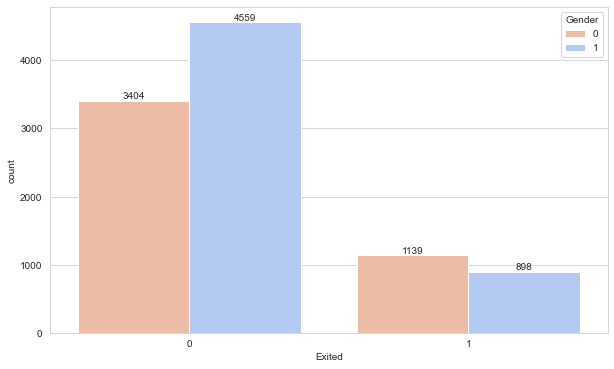

In [101]:
ax = sns.countplot(x='Exited',data=df,hue='Gender',palette="coolwarm_r")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

<IPython.core.display.Javascript object>

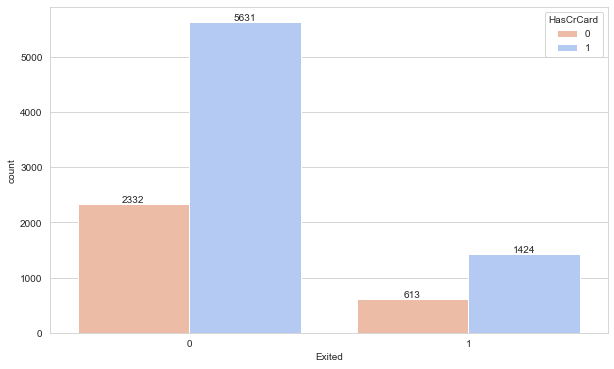

In [102]:
ax = sns.countplot(x='Exited',data=df, hue='HasCrCard', palette="coolwarm_r")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

<IPython.core.display.Javascript object>

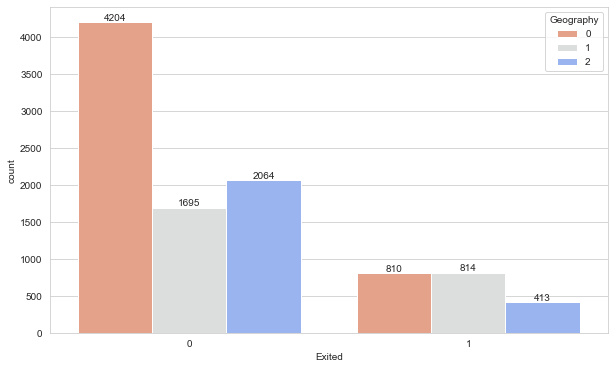

In [103]:
ax = sns.countplot(x='Exited',data=df, hue='Geography', palette="coolwarm_r")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2]);

<IPython.core.display.Javascript object>

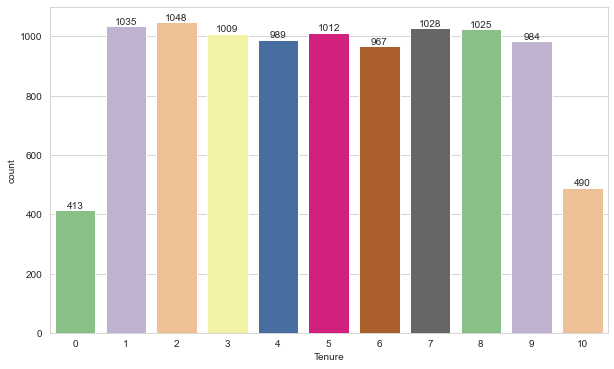

In [104]:
ax = sns.countplot(df["Tenure"],palette="Accent");
ax.bar_label(ax.containers[0]);

<IPython.core.display.Javascript object>

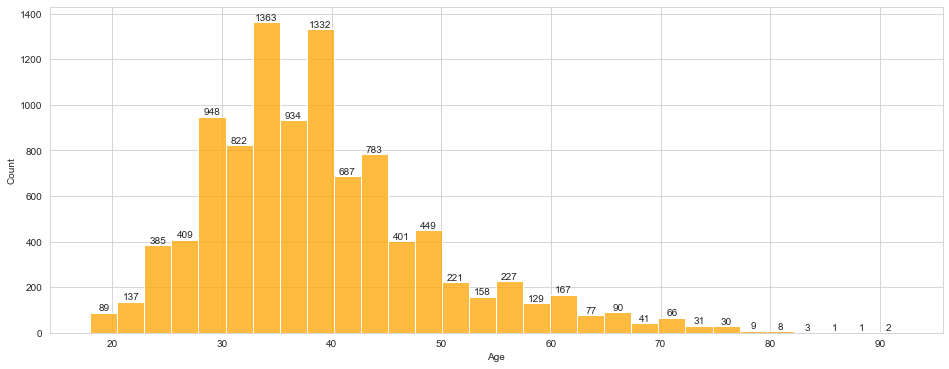

In [105]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x="Age",bins=30, color="orange");
ax.bar_label(ax.containers[0]);

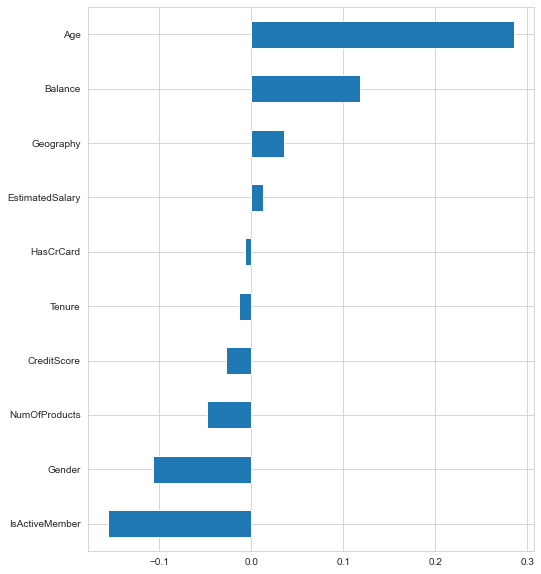

In [106]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

<IPython.core.display.Javascript object>

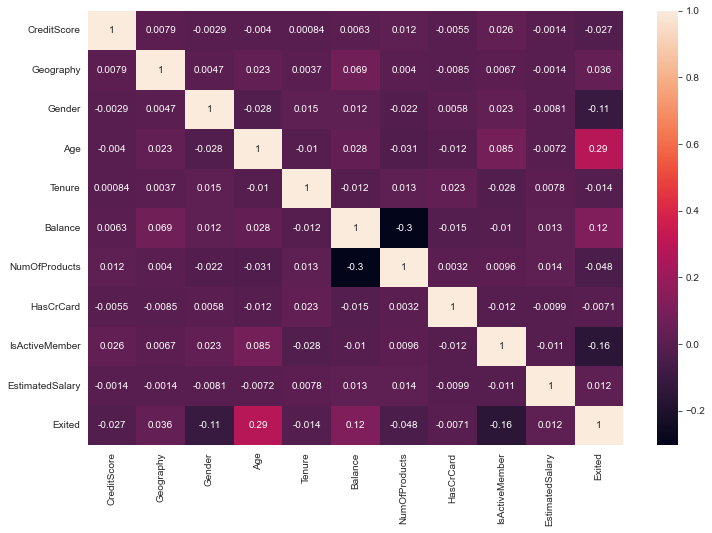

In [107]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot=True);

## Preprocessing of Data
- Train | Test Split, Scalling

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [129]:
seed = 42

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()

In [133]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
print(X_train.shape)
print(X_test.shape)

(7000, 10)
(3000, 10)


In [135]:
print(y_train.shape)
print(y_test.shape)

(7000,)
(3000,)


## Modelling & Model Performance

### Import related libraries

In [154]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping

In [155]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [156]:
# def eval_metric(actual, pred):
    # mae = mean_absolute_error(actual, pred)
   # mse = mean_squared_error(actual, pred)
    #rmse = np.sqrt(mean_squared_error(actual, pred))
   # score = r2_score(actual, pred)
   # return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

### Creating Model

### without class_weigth

In [167]:
""" class_weight: Optional dictionary mapping class indices (integers)
        to a weight (float) value, used for weighting the loss function
        (during training only).
        This can be useful to tell the model to
        "pay more attention" to samples from
        an under-represented class."""


# define sequential model

model = Sequential()
model.add(Dense(15, input_shape=(10,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5,  activation = 'relu'))
model.add(Dense(1, activation='sigmoid')) # we use sigmoid for binary output
model.summary()


# compile the model

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])


# now we fit our model to training data
history = model.fit(X_train, y_train, epochs=250, validation_split = 0.2, batch_size=128 )

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 15)                165       
                                                                 
 dense_82 (Dense)            (None, 10)                160       
                                                                 
 dense_83 (Dense)            (None, 5)                 55        
                                                                 
 dense_84 (Dense)            (None, 1)                 6         
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
44/44 [==============================] - 0s 4ms/step - loss: 0.5326 - accuracy: 0.7914 - val_loss: 0.5058 - val_accuracy: 0.7943
Epoch 2/250
44/44 [===========================

Epoch 110/250
44/44 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8564 - val_loss: 0.3563 - val_accuracy: 0.8471
Epoch 111/250
44/44 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8573 - val_loss: 0.3567 - val_accuracy: 0.8543
Epoch 112/250
44/44 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8579 - val_loss: 0.3535 - val_accuracy: 0.8500
Epoch 113/250
44/44 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8579 - val_loss: 0.3545 - val_accuracy: 0.8550
Epoch 114/250
44/44 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8577 - val_loss: 0.3551 - val_accuracy: 0.8521
Epoch 115/250
44/44 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8573 - val_loss: 0.3540 - val_accuracy: 0.8521
Epoch 116/250
44/44 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8577 - val_loss: 0.3527 - val_accuracy: 0.8514

44/44 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8625 - val_loss: 0.3436 - val_accuracy: 0.8521
Epoch 225/250
44/44 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.8602 - val_loss: 0.3470 - val_accuracy: 0.8479
Epoch 226/250
44/44 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8600 - val_loss: 0.3428 - val_accuracy: 0.8536
Epoch 227/250
44/44 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.8618 - val_loss: 0.3426 - val_accuracy: 0.8557
Epoch 228/250
44/44 [==============================] - 0s 3ms/step - loss: 0.3315 - accuracy: 0.8604 - val_loss: 0.3430 - val_accuracy: 0.8550
Epoch 229/250
44/44 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8623 - val_loss: 0.3442 - val_accuracy: 0.8514
Epoch 230/250
44/44 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8612 - val_loss: 0.3436 - val_accuracy: 0.8536
Epoch 231/250

In [165]:
#loss_df = pd.DataFrame(model.history.history)
#loss_df.plot()

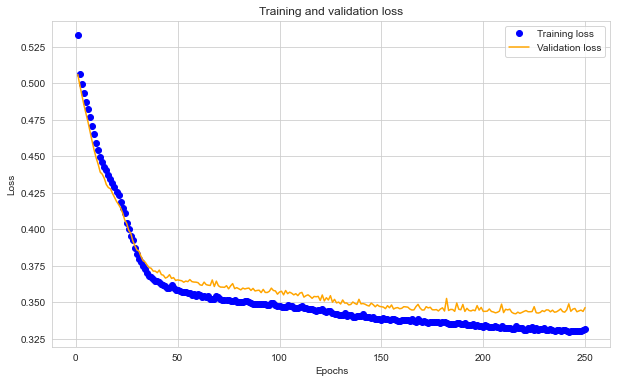

In [169]:
history_dict = history.history

loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 

epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

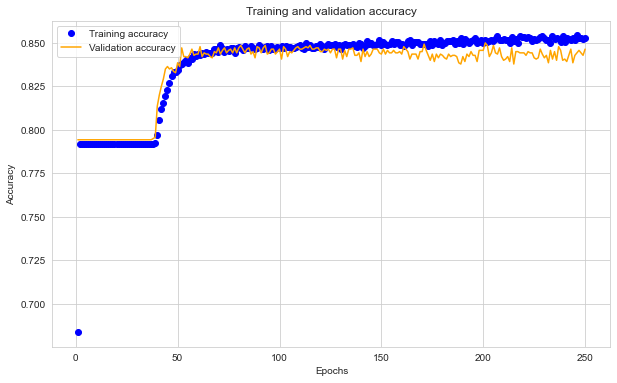

In [177]:
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Evaluate

In [170]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 767us/step - loss: 0.3326 - accuracy: 0.8683


[0.3326077461242676, 0.8683333396911621]

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [172]:
""" class_weight: Optional dictionary mapping class indices (integers)
        to a weight (float) value, used for weighting the loss function
        (during training only).
        This can be useful to tell the model to
        "pay more attention" to samples from
        an under-represented class."""


# define sequential model

# define sequential model

model = Sequential()
model.add(Dense(15, input_shape=(10,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5,  activation = 'relu'))
model.add(Dense(1, activation='sigmoid')) # we use sigmoid for binary output
model.summary()


# compile the model

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# now we fit our model to training data

class_weight = {0:3 , 1:1}

history=model.fit(X_train, y_train, epochs=250, batch_size=128, validation_split = 0.2, class_weight=class_weight)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 15)                165       
                                                                 
 dense_90 (Dense)            (None, 10)                160       
                                                                 
 dense_91 (Dense)            (None, 5)                 55        
                                                                 
 dense_92 (Dense)            (None, 1)                 6         
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
44/44 [==============================] - 1s 6ms/step - loss: 1.6453 - accuracy: 0.6837 - val_loss: 0.5850 - val_accuracy: 0.7943
Epoch 2/250
44/44 [===========================

Epoch 110/250
44/44 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.8486 - val_loss: 0.4163 - val_accuracy: 0.8464
Epoch 111/250
44/44 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.8470 - val_loss: 0.3955 - val_accuracy: 0.8464
Epoch 112/250
44/44 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.8464 - val_loss: 0.3932 - val_accuracy: 0.8471
Epoch 113/250
44/44 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.8498 - val_loss: 0.4034 - val_accuracy: 0.8479
Epoch 114/250
44/44 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.8477 - val_loss: 0.4036 - val_accuracy: 0.8471
Epoch 115/250
44/44 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.8486 - val_loss: 0.3942 - val_accuracy: 0.8486
Epoch 116/250
44/44 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.8473 - val_loss: 0.3934 - val_accuracy: 0.8464

44/44 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8511 - val_loss: 0.3849 - val_accuracy: 0.8443
Epoch 225/250
44/44 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.8525 - val_loss: 0.4138 - val_accuracy: 0.8414
Epoch 226/250
44/44 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8514 - val_loss: 0.4134 - val_accuracy: 0.8407
Epoch 227/250
44/44 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.8521 - val_loss: 0.4031 - val_accuracy: 0.8414
Epoch 228/250
44/44 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.8536 - val_loss: 0.3978 - val_accuracy: 0.8464
Epoch 229/250
44/44 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.8537 - val_loss: 0.4061 - val_accuracy: 0.8436
Epoch 230/250
44/44 [==============================] - 0s 4ms/step - loss: 0.4824 - accuracy: 0.8527 - val_loss: 0.4065 - val_accuracy: 0.8414
Epoch 231/250

In [173]:
#loss_df = pd.DataFrame(model.history.history)
#loss_df.plot()

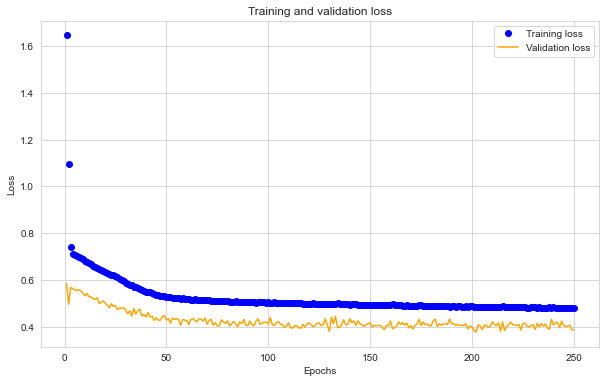

In [175]:
history_dict = history.history

loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 

epochs = range(1, len(loss_values) + 1) 

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

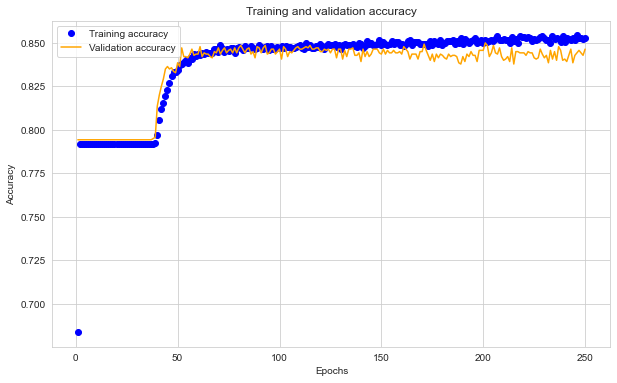

In [178]:
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Evaluate

In [176]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8593


[0.36554670333862305, 0.859333336353302]

## GridSearchCV

#### Evaluate

## Final Model and Model Deployment

### Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___